<a href="https://colab.research.google.com/github/Nageswar-Sahoo/Computer-Vision-Project/blob/main/S10/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!git clone https://github.com/Nageswar-Sahoo/Computer-Vision-Project.git

Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 8988, done.
remote: Counting objects: 100% (8988/8988), done.
remote: Compressing objects: 100% (8570/8570), done.
remote: Total 8988 (delta 1091), reused 7903 (delta 290), pack-reused 0
Receiving objects: 100% (8988/8988), 311.65 MiB | 38.71 MiB/s, done.
Resolving deltas: 100% (1091/1091), done.
Checking out files: 100% (14851/14851), done.


In [44]:
!pip install -U git+https://github.com/albumentations-team/albumentations
import albumentations 
from albumentations.pytorch import ToTensorV2

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-qydmqsl9
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-qydmqsl9


In [48]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 32.38 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.
test  train  val  wnids.txt  words.txt


In [2]:
cd Computer-Vision-Project

/content/Computer-Vision-Project


In [3]:
cd template 

/content/Computer-Vision-Project/template


In [26]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/Nageswar-Sahoo/Computer-Vision-Project
   c0b717a..af6c548  main       -> origin/main
Updating c0b717a..af6c548
Fast-forward
 template/main.py            | 7 ++++++-
 template/trainer/trainer.py | 6 +++---
 2 files changed, 9 insertions(+), 4 deletions(-)


In [7]:
from parse_config import ConfigParser
from trainer import Trainer
from utils import prepare_device
from utils import get_splited_data
import model.loss as module_loss
import model.metric as module_metric
import torch.optim as optim
import logging
import numpy as np
import torch
import model.customresnet as module_resnet
import utils
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
import torch
import data_loader.data_loaders as data_loaders
import torchvision.models as models
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR


In [8]:
    # added logger to track change
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()
    train_data_u, train_labels_u, test_data, test_labels = get_splited_data()
    train_labels_u = train_labels_u.astype(float)
    test_labels = test_labels.astype(float)

    data_loader = data_loaders.get_train_data_loader(train_data_u, train_labels_u, 64)

    valid_data_loader = data_loaders.get_test_data_loader(test_data, test_labels, 64)

    # build model architecture, then print to console
    model = models.resnet18(True)
    #Finetune Final few layers to adjust for tiny imagenet input
    model.avgpool = nn.AdaptiveAvgPool2d(1)
    model.fc.out_features = 200

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # lr_scheduler = StepLR(optimizer, step_size=20, gamma=0.1)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler)



starting loading data
finished loading data, in 14.452285528182983 seconds
test data shape:  (30000, 64, 64, 3)
test_labels.shape:  (30000, 200)
train data shape:  (80000, 64, 64, 3)
train label shape:  (80000, 200)


In [9]:
trainer.train()

Streaming output truncated to the last 5000 lines.
Train Epoch: 20 [656/1250 (52%)] Loss: 1.206408
Train Epoch: 20 [664/1250 (53%)] Loss: 1.332584
Train Epoch: 20 [672/1250 (54%)] Loss: 1.571027
Train Epoch: 20 [680/1250 (54%)] Loss: 1.351461
Train Epoch: 20 [688/1250 (55%)] Loss: 1.540320
Train Epoch: 20 [696/1250 (56%)] Loss: 1.137895
Train Epoch: 20 [704/1250 (56%)] Loss: 1.385375
Train Epoch: 20 [712/1250 (57%)] Loss: 1.453871
Train Epoch: 20 [720/1250 (58%)] Loss: 1.744778
Train Epoch: 20 [728/1250 (58%)] Loss: 1.525991
Train Epoch: 20 [736/1250 (59%)] Loss: 1.321761
Train Epoch: 20 [744/1250 (60%)] Loss: 1.494789
Train Epoch: 20 [752/1250 (60%)] Loss: 1.502480
Train Epoch: 20 [760/1250 (61%)] Loss: 1.236891
Train Epoch: 20 [768/1250 (61%)] Loss: 1.304450
Train Epoch: 20 [776/1250 (62%)] Loss: 1.714777
Train Epoch: 20 [784/1250 (63%)] Loss: 1.183879
Train Epoch: 20 [792/1250 (63%)] Loss: 1.419891
Train Epoch: 20 [800/1250 (64%)] Loss: 1.204344
Train Epoch: 20 [808/1250 (65%)] Loss

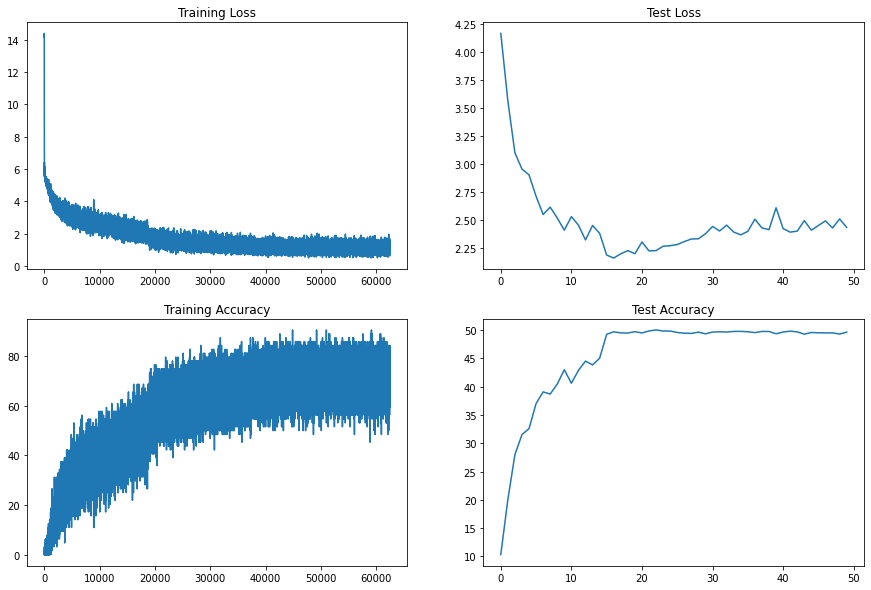

In [11]:
utils.showaccuracy_and_loss_curve(trainer)

In [5]:
ls

base/         IMagenet/  normalization/    saved/
config.json   LICENSE    parse_config.py   trainer/
data_loader/  logger/    __pycache__/      traininglogsincoolab.ipynb
dog.jpg       main.py    README.md         transformation/
gb.jpg        model/     requirements.txt  utils/


In [ ]:
epochs = 30
criterion = nn.CrossEntropyLoss()


In [9]:
    # added logger to track change
    logger = logging.getLogger("trian")
    # Read the config.json
    config = ConfigParser.from_args()
    train_data_u, train_labels_u, test_data, test_labels = get_splited_data()
    train_labels_u = train_labels_u.astype(float)
    test_labels = test_labels.astype(float)

    data_loader = data_loaders.get_train_data_loader(train_data_u, train_labels_u, 64)

    valid_data_loader = data_loaders.get_test_data_loader(test_data, test_labels, 64)

    # build model architecture, then print to console
    model = models.resnet18(True)
    #Finetune Final few layers to adjust for tiny imagenet input
    model.avgpool = nn.AdaptiveAvgPool2d(1)
    model.fc.out_features = 200

    logger.info(model)

    # prepare for (multi-device) GPU training
    n_gpu = 1
    device, device_ids = prepare_device(n_gpu)
    model = model.to(device)
    if len(device_ids) > 1:
        model = torch.nn.DataParallel(model, device_ids=device_ids)

    # get function handles of loss and metrics
    criterion = module_loss.crossentropyloss
    metrics = [module_metric.accuracy]

    # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # lr_scheduler = StepLR(optimizer, step_size=20, gamma=0.1)
    #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    #lr_scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
    epochs=50
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = OneCycleLR(optimizer, max_lr=0.02, steps_per_epoch=len(data_loader),
                       epochs=epochs, div_factor=10, final_div_factor=10,
                       pct_start=10/epochs)

    trainer = Trainer(model, criterion, metrics, optimizer,
                      config=config,
                      device=device,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=scheduler)



starting loading data
finished loading data, in 13.653182029724121 seconds
test data shape:  (30000, 64, 64, 3)
test_labels.shape:  (30000, 200)
train data shape:  (80000, 64, 64, 3)
train label shape:  (80000, 200)
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
     

In [10]:
trainer.train()

Streaming output truncated to the last 5000 lines.
Train Epoch: 20 [672/1250 (54%)] Loss: 1.275675
Train Epoch: 20 [680/1250 (54%)] Loss: 1.163692
Train Epoch: 20 [688/1250 (55%)] Loss: 1.932240
Train Epoch: 20 [696/1250 (56%)] Loss: 1.466744
Train Epoch: 20 [704/1250 (56%)] Loss: 1.575891
Train Epoch: 20 [712/1250 (57%)] Loss: 1.424260
Train Epoch: 20 [720/1250 (58%)] Loss: 1.824488
Train Epoch: 20 [728/1250 (58%)] Loss: 1.976860
Train Epoch: 20 [736/1250 (59%)] Loss: 1.607090
Train Epoch: 20 [744/1250 (60%)] Loss: 1.838262
Train Epoch: 20 [752/1250 (60%)] Loss: 1.739406
Train Epoch: 20 [760/1250 (61%)] Loss: 1.898828
Train Epoch: 20 [768/1250 (61%)] Loss: 1.374759
Train Epoch: 20 [776/1250 (62%)] Loss: 1.235361
Train Epoch: 20 [784/1250 (63%)] Loss: 1.657669
Train Epoch: 20 [792/1250 (63%)] Loss: 1.668955
Train Epoch: 20 [800/1250 (64%)] Loss: 2.031112
Train Epoch: 20 [808/1250 (65%)] Loss: 2.051946
Train Epoch: 20 [816/1250 (65%)] Loss: 1.788586
Train Epoch: 20 [824/1250 (66%)] Loss

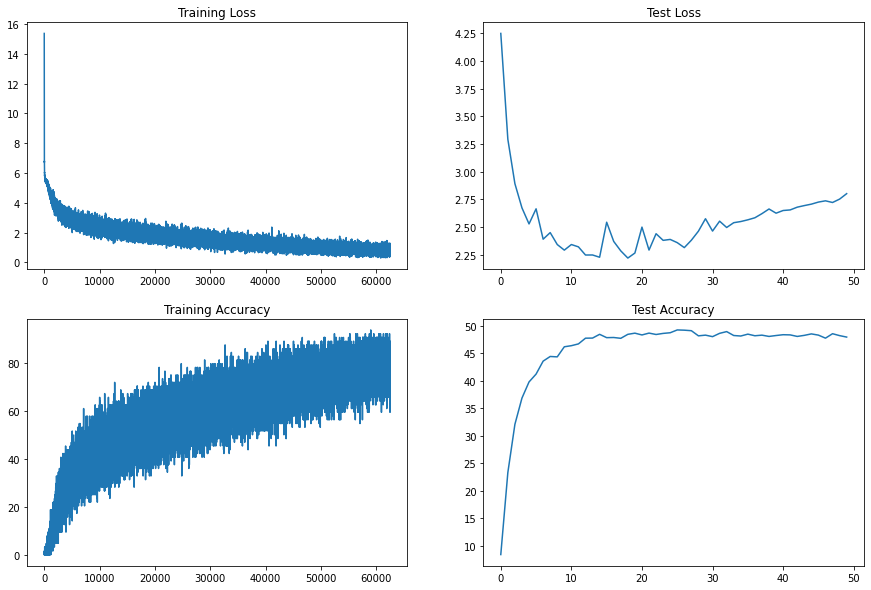

In [11]:
utils.showaccuracy_and_loss_curve(trainer)

In [ ]:
trainer.